# Лабораторная работа №4 (Laboratory work 4)
### Задача класстеризации - исследование красного вина (Clustering task - Red Wine Research)

--------------------------------------
### Эпилог (Epilogue):
#### Набор данных относится к красному варианту португальского вина Vinho Verde. Из-за конфиденциальности и логистических проблем доступны только физико-химические (входные данные) и "качество" вина. Также учитываем, что нет дополнительных данных, т.е. о сортах винограда, марке вина, отпускной цене вина и т.д. (The dataset refers to the red variant of the Portuguese wine Vinho Verde. Due to confidentiality and logistical issues, only the physico-chemical (input data) and "quality" of the wine are available. We also take into consideration that there is no additional data, i.e. about grape varieties, wine brand, selling price of wine, etc.)
### Цель (Goal):
#### Данные не стандартизированы, не сбалансированы. Нужно научиться классифицировать данные и сравнить методы: задачу классификации и её после метода главных компонент, сделать вывод о лучшей классификации. (The data is not standardized, not balanced. It is necessary to learn how to classify data and compare methods: the classification task and its main components after the method, to conclude about the best classification.)

-------------------------------------
## Задание 1-2 (Task 1-2)
#### Загрузка и анализ исходных данных (Downloading and analyzing input data)

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('vine.dat', header=None)
df.columns =['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol', 'Class']
df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### Делаем начало классов с 0

In [4]:
df['Class'] = df['Class'] - 3
df.dtypes

FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
PH                    float64
Sulphates             float64
Alcohol               float64
Class                   int64
dtype: object

## Задание 3 (Task 3)
#### Стандартизация

In [4]:
from sklearn import preprocessing
import numpy as np

In [5]:
Columns = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']

In [6]:
scaler_std = preprocessing.StandardScaler()
df[Columns] = scaler_std.fit_transform(df[Columns])
df.dropna()
df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5


## Задание 4
#### Выполните расчёт главных компонент. Преобразуйте набор к новой системе координат и отсеките те координаты, которым соответствует собственные значения, меньшие 1.

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components = 11)
table_pca = pca.fit_transform(df[Columns])
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)
explained_variance = pca.explained_variance_
print("Собственные значения: \n", explained_variance)

[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]
Собственные значения: 
 [3.10107182 1.92711489 1.55151379 1.21399175 0.95989238 0.66002104
 0.58415655 0.42322138 0.34485779 0.18144664 0.05959558]


In [9]:
m = 0
for i in range(0, 10):
    if (explained_variance[i] >= 1):
        m += 1
    else:
        break
        
print(f'Значения больше 1 имеют {m} главных компонент')

Значения больше 1 имеют 4 главных компонент


In [10]:
correlation = df[Columns].corr() #корреляционная матрица

In [11]:
import matplotlib.pyplot as plt
# import scipy.stats as sts
import seaborn as sns

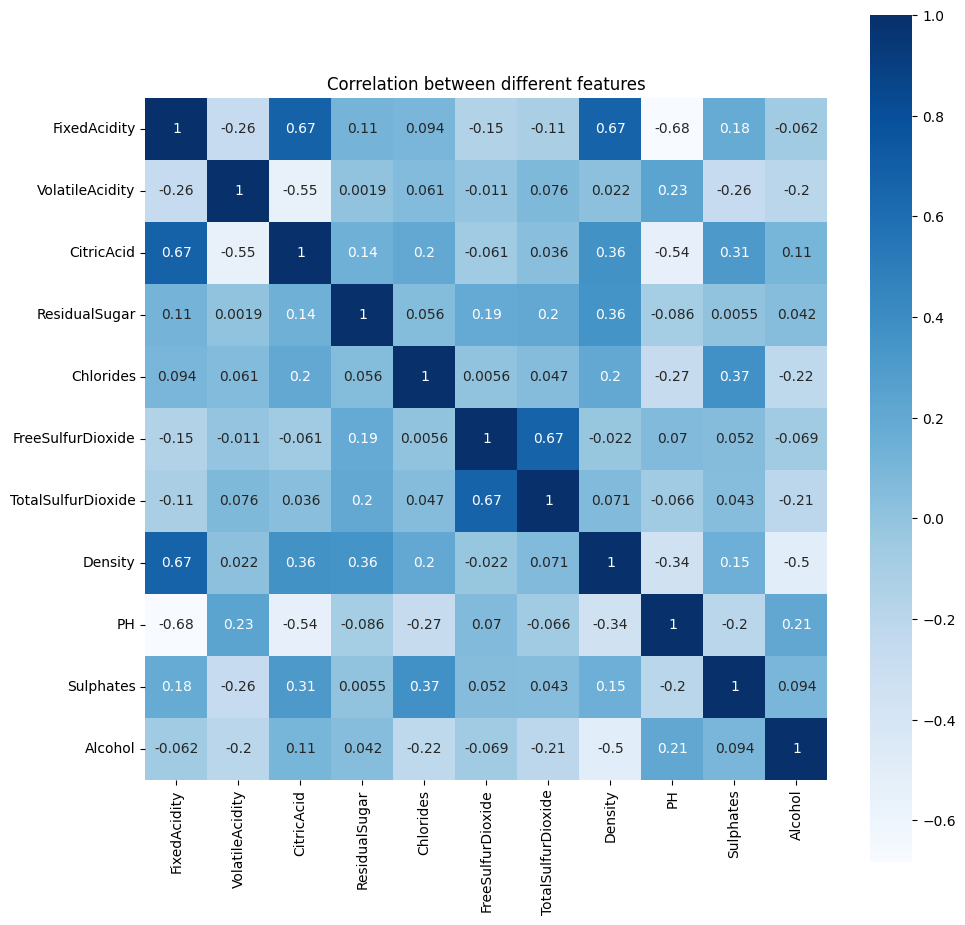

In [12]:
plt.figure(figsize=(11,11)) 
sns.heatmap(correlation, vmax=1, square=True, annot=True,cmap='Blues')
plt.title('Correlation between different features')
plt.show()

In [13]:
eigenvalues, eigenvector = np.linalg.eig(correlation)
couple_lst = []
for i in range(len(eigenvalues)):
    couple_lst.append((eigenvalues[i], eigenvector[:, i]))

lst = sorted(couple_lst, key=lambda x: x[0], reverse=True)
eigenvalues_sorted = sorted(eigenvalues, reverse=True)

In [14]:
eigenvalues_sorted

[3.0991324406699006,
 1.9259096896024472,
 1.55054348877474,
 1.213232530578324,
 0.9592920713459797,
 0.6596082648694092,
 0.5837912191926704,
 0.4229566996579818,
 0.3446421168187548,
 0.18133316656790444,
 0.05955831192188944]

In [15]:
# Коэффициенты линейного преобразования центрировано-нормированных исходных признаков 
vector_df = pd.DataFrame(eigenvector, columns=['Factor_' + str(i + 1) for i in range(len(Columns))], index=Columns)

In [16]:
# матрица нагрузок
A = vector_df @ np.diag(np.sqrt(eigenvalues_sorted))
A.index = Columns

In [32]:
# Матрица индивидуальных значений главных компонент
pc = 4
F = (np.linalg.inv(A.T @ A) @ A.T @ df[Columns].T).T
F.columns = ['Factor_' + str(i + 1) for i in range(len(Columns))]
#F = F.sort_values("Factor_1", ascending=False)
F = F.iloc[:, :pc] # Берем первые pc главных компонент
F['Class'] = df['Class']
F

,Factor_1,Factor_2,Factor_3,Factor_4,Class
0,-0.919960,0.324945,-1.425026,0.039711,2
1,-0.453962,1.337795,-0.732159,0.497578,2
2,-0.425167,0.635579,-0.940722,0.373157,2
3,1.339255,-0.194539,0.195541,-0.842920,3
4,-0.919960,0.324945,-1.425026,0.039711,2
...,...,...,...,...,...
1594,-1.221573,0.586758,0.495550,0.370130,2
1595,-1.257925,0.643551,1.451486,0.375865,3
1596,-0.827141,0.224638,0.902853,0.446565,3
1597,-1.289748,0.706018,0.504305,0.580834,2


In [31]:
# df=df[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Class']]
# Columns = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Class']
# df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Class
0,-0.528360,0.961877,-1.391472,-0.453218,5
1,-0.298547,1.967442,-1.391472,0.043416,5
2,-0.298547,1.297065,-1.186070,-0.169427,5
3,1.654856,-1.384443,1.484154,-0.453218,6
4,-0.528360,0.961877,-1.391472,-0.453218,5
...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,5
1595,-1.390155,0.123905,-0.877968,-0.240375,6
1596,-1.160343,-0.099554,-0.723916,-0.169427,6
1597,-1.390155,0.654620,-0.775267,-0.382271,5


## Задание 5
#### Выполните кластеризацию данных с помощью метода Affinity Propagation. Сравните число кластеров с реальным.

In [108]:
df['Class'].unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

In [18]:
print("Number of real classes = ", len(df['Class'].unique()))

Number of real classes =  6


In [20]:
from sklearn.cluster import AffinityPropagation

In [94]:
af = AffinityPropagation().fit(F[['Factor_1','Factor_2','Factor_3','Factor_4']])
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
print(labels)
print(cluster_centers_indices)
print(len(cluster_centers_indices))

[13 35 46 ... 61 61 51]
[  14   36   47   51   63   91  106  122  142  151  157  163  166  187
  240  241  272  306  319  325  359  400  411  414  420  429  452  461
  473  483  501  526  539  554  617  629  633  638  653  666  670  674
  684  722  774  776  803  816  852  873  939  965  987 1008 1030 1052
 1081 1105 1111 1127 1150 1171 1217 1230 1235 1260 1267 1285 1304 1307
 1371 1401 1413 1474 1494 1498 1545 1575 1595]
79


#### Без подбора параметров данный метод показывает разбиение для 79 классов, поэтому подберем параметры, чтобы было 6 классов.

In [95]:
af = AffinityPropagation(preference = -180, damping = 0.9).fit(F[['Factor_1','Factor_2','Factor_3','Factor_4']])
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
print(cluster_centers_indices)
print(len(cluster_centers_indices))

[ 189  631  959 1102 1165 1215]
6


In [179]:
titles = ['Factor_1','Factor_2','Factor_3','Factor_4']
colors_map = {0: 'yellow', 1: 'green', 2: 'blue', 3: 'red', 4: 'fuchsia', 5: 'orange', 
              6: 'lavender', 7: 'tan', 8: 'springgreen', 9: 'powderblue', 10: 'orchid', 11: 'goldenrod'}
F['color_stand'] = df['Class']
F['color_stand'] = F['color_stand'].apply(lambda x: colors_map[x])
F['color'] = df['Class']
F['color'] = F['color'].apply(lambda x: colors_map[x])
F['color_af'] = labels
F['color_af'] = F['color_af'].apply(lambda x: colors_map[x])

In [180]:
import matplotlib.pyplot as plt

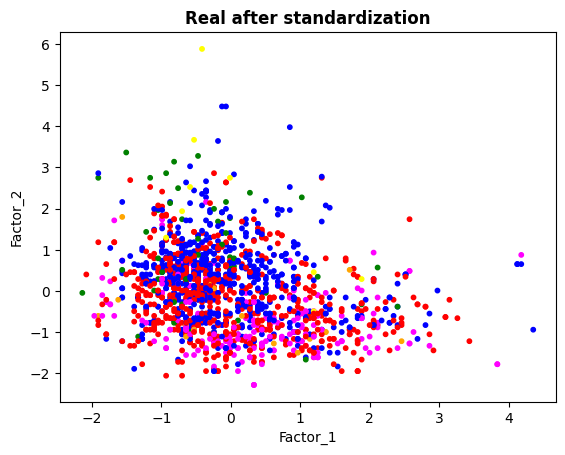

In [181]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]
plt.title("Real after standardization", fontweight='bold')
plt.xlabel(titles[0])
plt.ylabel(titles[1])
plt.scatter(x, y, c = F['color_stand'], s = 10)

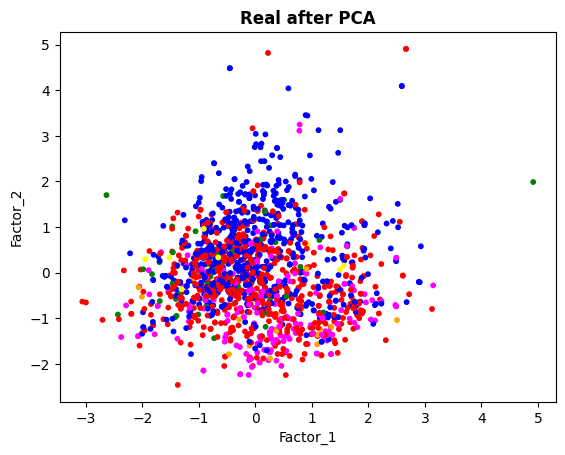

In [182]:
x = F.iloc[:, 0]
y = F.iloc[:, 1]
plt.title("Real after PCA", fontweight='bold')
plt.xlabel(titles[0])
plt.ylabel(titles[1])
plt.scatter(x, y, c = F['color'], s = 10)

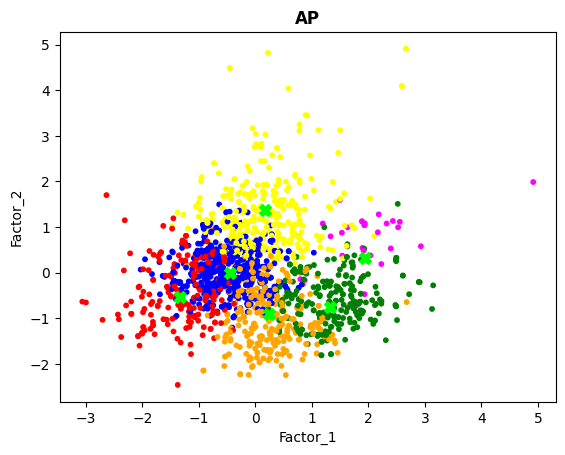

In [183]:
plt.title("AP", fontweight='bold')
plt.xlabel(titles[0])
plt.ylabel(titles[1])
plt.scatter(x, y, c = F['color_af'], s = 10)

plt.scatter(F.iloc[cluster_centers_indices[0], 0],
F.iloc[cluster_centers_indices[0], 1], c = ['lime'], s = 70, marker = 'X')

plt.scatter(F.iloc[cluster_centers_indices[1], 0],
F.iloc[cluster_centers_indices[1], 1], c = ['lime'], s = 70, marker = 'X')

plt.scatter(F.iloc[cluster_centers_indices[2], 0],
F.iloc[cluster_centers_indices[2], 1], c = ['lime'], s = 70, marker = 'X')

plt.scatter(F.iloc[cluster_centers_indices[3], 0],
F.iloc[cluster_centers_indices[3], 1], c = ['lime'], s = 70, marker = 'X')

plt.scatter(F.iloc[cluster_centers_indices[4], 0],
F.iloc[cluster_centers_indices[4], 1], c = ['lime'], s = 70, marker = 'X')

plt.scatter(F.iloc[cluster_centers_indices[5], 0],
F.iloc[cluster_centers_indices[5], 1], c = ['lime'], s = 70, marker = 'X')

plt.show()

## Задание 6
### Используя метод силуэта, определите оптимальное число кластеров для кластеризации методами DBSCAN и Spectral Clustering. Сравните с реальным числом кластеров.

In [109]:
print("Number of real classes = ", len(df['Class'].unique()))

Number of real classes =  6


In [112]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering

In [149]:
silhouette = []
max = 0
rg = range(2, 11)
for k in rg:
    sc1 = SpectralClustering(n_clusters = k, affinity = 'nearest_neighbors').fit(F[['Factor_1','Factor_2','Factor_3','Factor_4']])
    preds_labels_sc1 = sc1.labels_
    silhouette.append(silhouette_score(F[['Factor_1','Factor_2','Factor_3','Factor_4']],preds_labels_sc1))

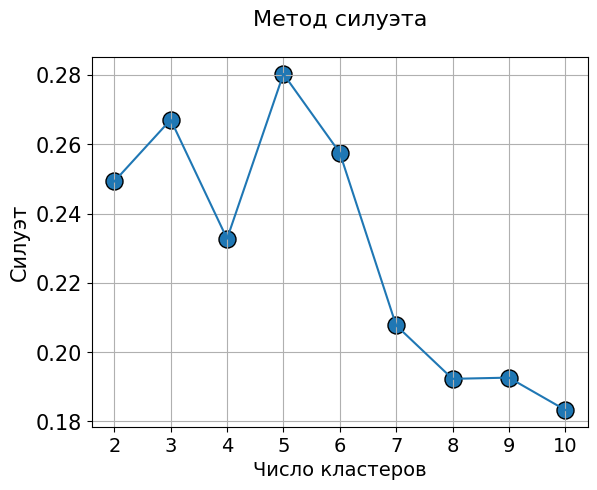

In [150]:
plt.title("Метод силуэта\n",fontsize=16)
plt.scatter(x=[i for i in rg],y=silhouette,s=150,edgecolor='k')
plt.plot(rg, silhouette)
plt.grid(True)
plt.xlabel("Число кластеров",fontsize=14)
plt.ylabel("Силуэт",fontsize=15)
plt.xticks([i for i in rg],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [151]:
silhouette = []
max = 0
rg = range(2, 11)
for k in rg:
    sc2 = SpectralClustering(n_clusters = k, affinity = 'rbf').fit(F[['Factor_1','Factor_2','Factor_3','Factor_4']])
    preds_labels_sc2 = sc2.labels_
    silhouette.append(silhouette_score(F[['Factor_1','Factor_2','Factor_3','Factor_4']],preds_labels_sc2))

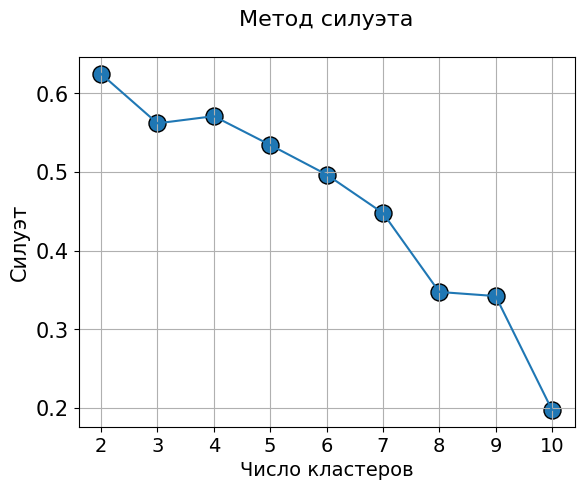

In [152]:
plt.title("Метод силуэта\n",fontsize=16)
plt.scatter(x=[i for i in rg],y=silhouette,s=150,edgecolor='k')
plt.plot(rg, silhouette)
plt.grid(True)
plt.xlabel("Число кластеров",fontsize=14)
plt.ylabel("Силуэт",fontsize=15)
plt.xticks([i for i in rg],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

#### С помощью метода Spectral Clustering опредилили, что оптимальное число кластеров для 
#### -метода ближайших соседей равно 5.
#### -полинома rbf равно 2.
#### В свою очередь количество реальных кластеров - 6, что не совпадает с полученным.

In [121]:
from sklearn.cluster import DBSCAN

In [139]:
silhouette = []
max = 0
rg = range(2, 11)
for k in rg:
    db = DBSCAN(eps=0.1).fit(F[['Factor_1','Factor_2','Factor_3','Factor_4']])
    preds = db.labels_
    silhouette.append(silhouette_score(F[['Factor_1','Factor_2','Factor_3','Factor_4']],preds))
    print(preds)

[-1 -1 -1 ... -1 -1 -1]
[-1 -1 -1 ... -1 -1 -1]
[-1 -1 -1 ... -1 -1 -1]
[-1 -1 -1 ... -1 -1 -1]
[-1 -1 -1 ... -1 -1 -1]
[-1 -1 -1 ... -1 -1 -1]
[-1 -1 -1 ... -1 -1 -1]
[-1 -1 -1 ... -1 -1 -1]
[-1 -1 -1 ... -1 -1 -1]


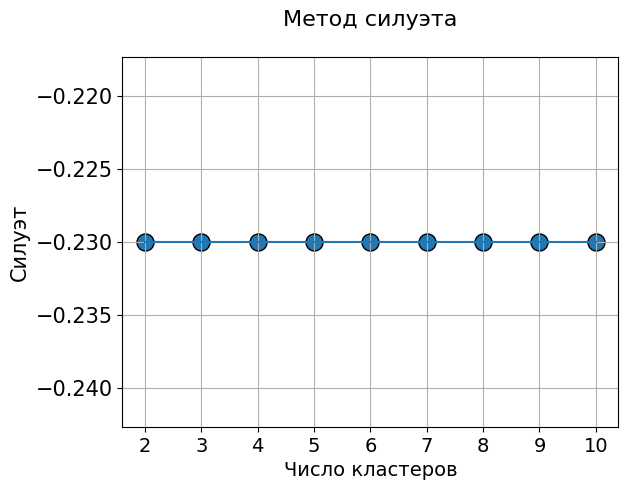

In [140]:
plt.title("Метод силуэта\n",fontsize=16)
plt.scatter(x=[i for i in rg],y=silhouette,s=150,edgecolor='k')
plt.plot(rg, silhouette)
plt.grid(True)
plt.xlabel("Число кластеров",fontsize=14)
plt.ylabel("Силуэт",fontsize=15)
plt.xticks([i for i in rg],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

ЧТО НЕ ТАК?

## Задание 7

#### K-means:

In [142]:
from sklearn.cluster import KMeans

In [144]:
kmeans = KMeans(n_clusters = 6)
F['Class_KM'] = kmeans.fit_predict(F[['Factor_1','Factor_2','Factor_3','Factor_4']])
centers = kmeans.cluster_centers_

In [145]:
F['color_km'] = F['Class_KM']
F['color_km'] = F['color_km'].apply(lambda x: colors_map[x])

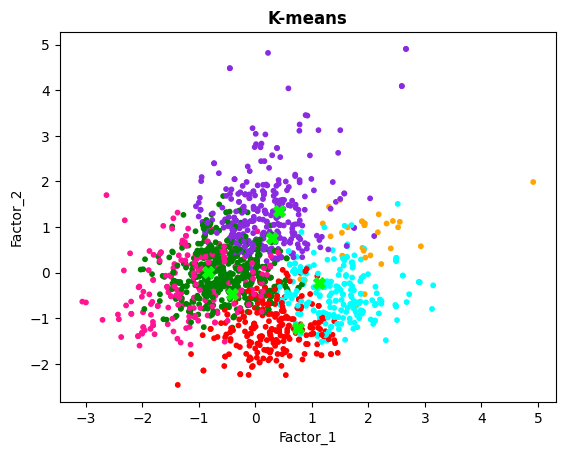

In [186]:
plt.title("K-means", fontweight='bold')
plt.xlabel(titles[0])
plt.ylabel(titles[1])
plt.scatter(x, y, c = F['color_km'], s = 10)
plt.scatter(centers[0][2], centers[0][1], c = ['lime'], s = 70, marker = 'X')
plt.scatter(centers[1][2], centers[1][1], c = ['lime'], s = 70, marker = 'X')
plt.scatter(centers[2][2], centers[2][1], c = ['lime'], s = 70, marker = 'X')
plt.scatter(centers[3][2], centers[3][1], c = ['lime'], s = 70, marker = 'X')
plt.scatter(centers[4][2], centers[4][1], c = ['lime'], s = 70, marker = 'X')
plt.scatter(centers[5][2], centers[5][1], c = ['lime'], s = 70, marker = 'X')

#### График для Spectral

In [167]:
sc1 = SpectralClustering(n_clusters = 5, affinity = 'nearest_neighbors').fit(F[['Factor_1','Factor_2','Factor_3','Factor_4']])
preds_labels_sc1 = sc1.labels_
sc2 = SpectralClustering(n_clusters = 2, affinity = 'rbf').fit(F[['Factor_1','Factor_2','Factor_3','Factor_4']])
preds_labels_sc2 = sc2.labels_

In [168]:
F['color_sc1'] = preds_labels_sc1
F['color_sc1'] = F['color_sc1'].apply(lambda x: colors_map_new[x])
F['color_sc2'] = preds_labels_sc2
F['color_sc2'] = F['color_sc2'].apply(lambda x: colors_map_new[x])

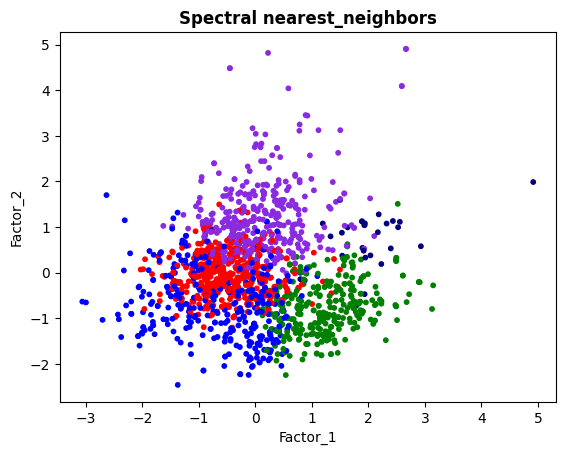

In [184]:
plt.title("Spectral nearest_neighbors", fontweight='bold')
plt.xlabel(titles[0])
plt.ylabel(titles[1])
plt.scatter(x, y, c = F['color_sc1'], s = 10)

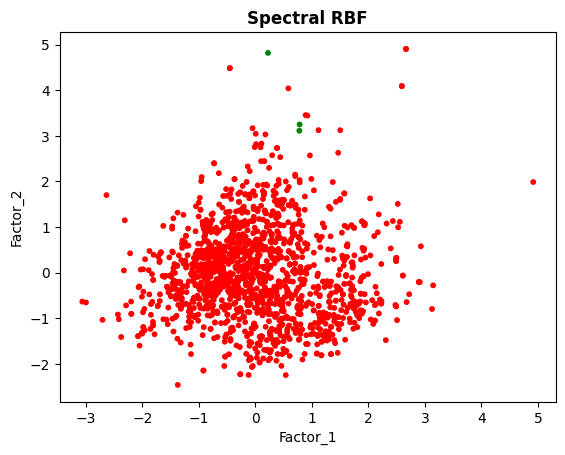

In [185]:
plt.title("Spectral RBF", fontweight='bold')
plt.xlabel(titles[0])
plt.ylabel(titles[1])
plt.scatter(x, y, c = F['color_sc2'], s = 10)

## Задание 7

#### Графики рядом для сравнения с реальными классами, классами, предсказанными k-means, и классами, предсказанными DBSCAN и Spectral Clustering

In [190]:
x = F.iloc[:, 0]
y = F.iloc[:, 1]

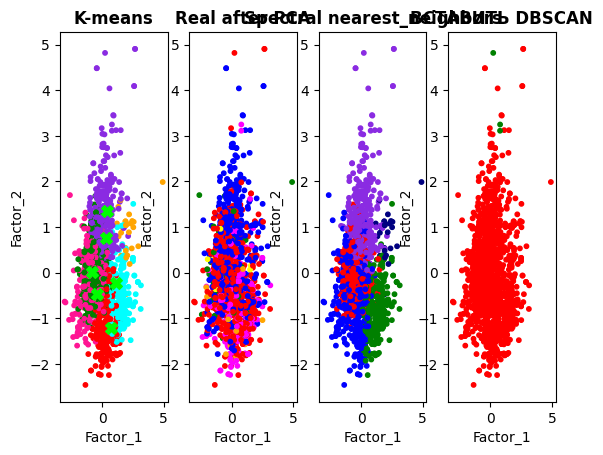

In [194]:
ax = plt.subplot(1, 4, 1)
ax.set_title("K-means", fontweight='bold')
ax.set_xlabel(titles[0])
ax.set_ylabel(titles[1])
plt.scatter(x, y, c = F['color_km'], s = 10)
plt.scatter(centers[0][2], centers[0][1], c = ['lime'], s = 70, marker = 'X')
plt.scatter(centers[1][2], centers[1][1], c = ['lime'], s = 70, marker = 'X')
plt.scatter(centers[2][2], centers[2][1], c = ['lime'], s = 70, marker = 'X')
plt.scatter(centers[3][2], centers[3][1], c = ['lime'], s = 70, marker = 'X')
plt.scatter(centers[4][2], centers[4][1], c = ['lime'], s = 70, marker = 'X')
plt.scatter(centers[5][2], centers[5][1], c = ['lime'], s = 70, marker = 'X')

ax = plt.subplot(1, 4, 2)
ax.set_title("Real after PCA", fontweight='bold')
ax.set_xlabel(titles[0])
ax.set_ylabel(titles[1])
plt.scatter(x, y, c = F['color'], s = 10)

ax = plt.subplot(1, 4, 3)
ax.set_title("Spectral nearest_neighbors", fontweight='bold')
ax.set_xlabel(titles[0])
ax.set_ylabel(titles[1])
plt.scatter(x, y, c = F['color_sc1'], s = 10)

ax = plt.subplot(1, 4, 4)
ax.set_title("ВСТАВИТЬ DBSCAN", fontweight='bold')
ax.set_xlabel(titles[0])
ax.set_ylabel(titles[1])
plt.scatter(x, y, c = F['color_sc2'], s = 10)

plt.show()

## ВЫВОД: Наилучшее разбиение получается по методу ...